Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


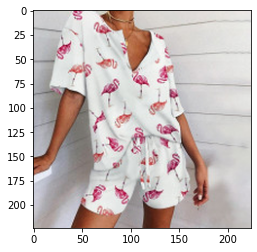

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 
import numpy as np
df = pd.read_pickle('gdrive/My Drive/Learn/Stanford/CS230/image_224x224_sale.pkl')
X = df['image_pixel']
y = df['high_sale']
X = X.to_numpy()
X = np.stack(X, axis=0)
plt.imshow(X[0])

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

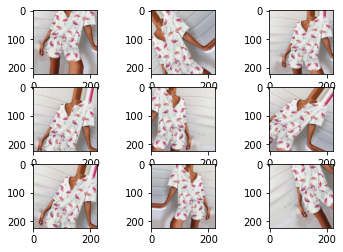

In [11]:
X0 = X[0].reshape((1,) + X[0].shape)

# prepare iterator
it = datagen.flow(X0, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X = X/255.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.14286, random_state=42)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of dev examples = " + str(X_dev.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(y_dev.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1179
number of dev examples = 197
number of test examples = 197
X_train shape: (1179, 224, 224, 3)
Y_train shape: (1179,)
X_dev shape: (197, 224, 224, 3)
Y_dev shape: (197,)
X_test shape: (197, 224, 224, 3)
Y_test shape: (197,)


In [13]:
# prepare iterator
train_generator = datagen.flow(X_train, y_train, batch_size = 32)
validation_generator = datagen.flow(X_dev, y_dev, batch_size = 8)

In [16]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet')
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 138,358,545
Trainable params: 1,001
Non-trainable params: 138,357,544
_________________________________________________________________


In [18]:
EPOCHS = 50

model.fit_generator(train_generator,
         validation_data=validation_generator,
         steps_per_epoch=len(X_train) / 32, epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
36/36 [==============================] - 32s 879ms/step - loss: 0.6917 - accuracy: 0.5649 - val_loss: 0.6878 - val_accuracy: 0.6345
Epoch 2/50
36/36 [==============================] - 19s 509ms/step - loss: 0.6886 - accuracy: 0.5827 - val_loss: 0.6829 - val_accuracy: 0.6345
Epoch 3/50
36/36 [==============================] - 19s 509ms/step - loss: 0.6859 - accuracy: 0.5827 - val_loss: 0.6792 - val_accuracy: 0.6345
Epoch 4/50
36/36 [==============================] - 19s 517ms/step - loss: 0.6841 - accuracy: 0.5827 - val_loss: 0.6760 - val_accuracy: 0.6345
Epoch 5/50
36/36 [==============================] - 19s 512ms/step - loss: 0.6832 - accuracy: 0.5827 - val_loss: 0.6730 - val_accuracy: 0.6345
Epoch 6/50
36/36 [==============================] - 19s 513ms/step - loss: 0.6825 - accuracy: 0.5827 - val_loss: 0.6710 - val_accuracy: 0.6345
Epoch 7/50
36/36 [==============================] - 19s 517ms/step - loss: 0.6824 - accuracy: 0.5827 - val_loss: 0.6701 - val_accuracy: 0.6345